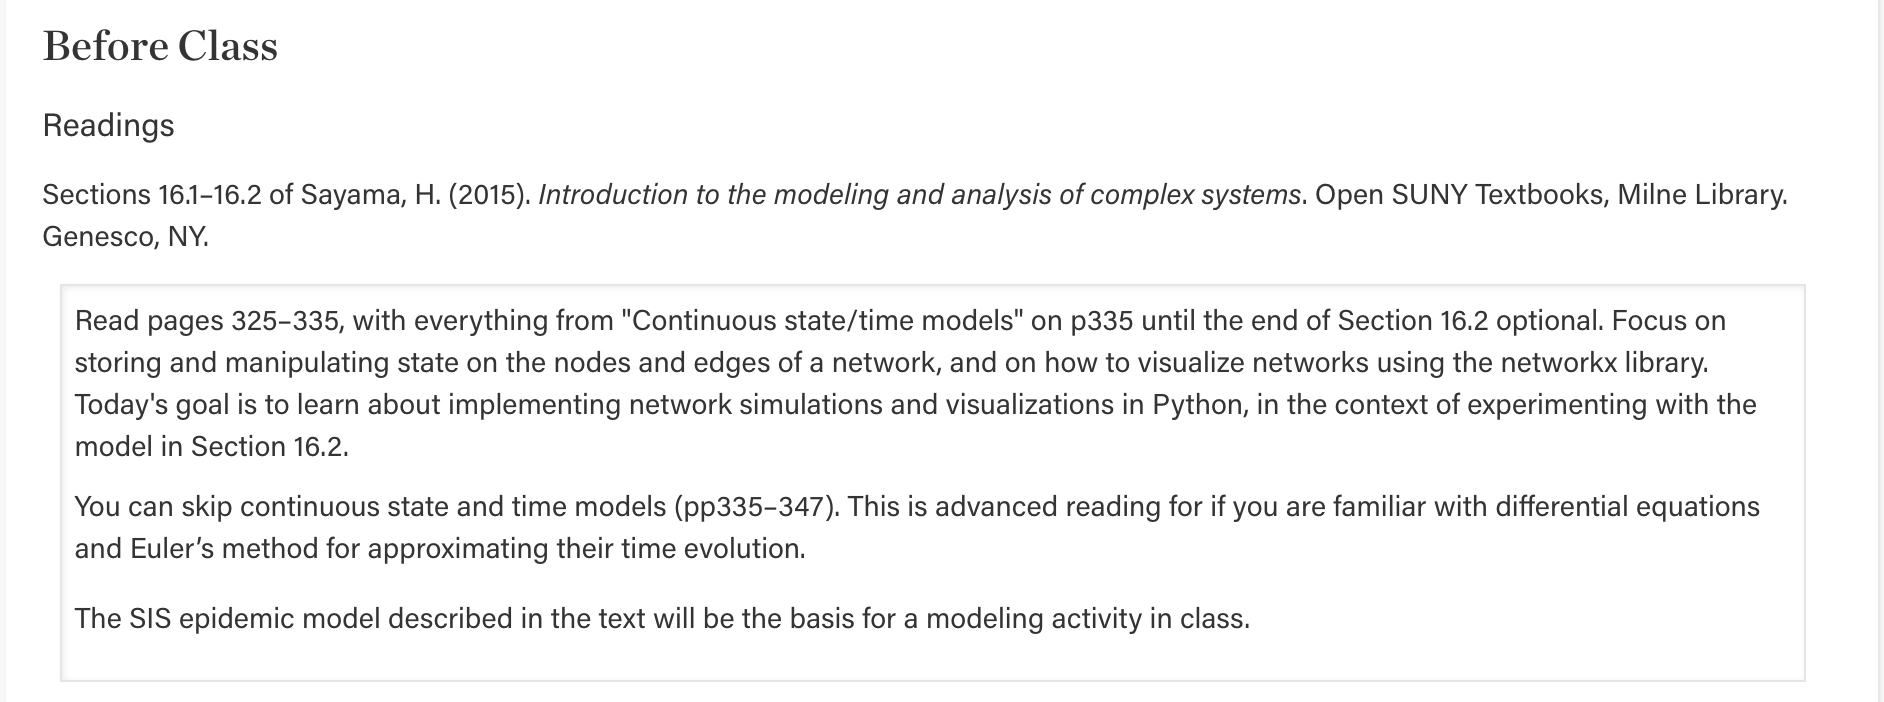

# Pre­class work
Create a Google document or a Gist to record your work for all exercises. Make sure the
document is shared so that it can be assessed, and be ready to paste a link to your
document into a class poll.
* Sayama Exercise 16.2. Revise the code above so that you can measure how many
steps it will take until the system reaches a consensus (i.e., homogenized state). Then
run multiple simulations (Monte Carlo simulations) to calculate the average time length
needed for consensus formation in the original voter model.


* Sayama Exercise 16.3. Revise the code further to implement (1) the reversed and (2)
the edge­based voter models. Then conduct Monte Carlo simulations to measure the
average time length needed for consensus formation in each case. Compare the results
between the three versions.

In [1]:
import matplotlib
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update_original():
    '''
    Original (“pull”) version: First, a “listener” node is randomly chosen from the network, and
    then a “speaker” node is randomly chosen from the listener’s neighbors.
    '''
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def update_reversed():
    '''
    Reversed (“push”) version: First, a “speaker” node is randomly chosen from the network,
    and then a “listener” node is randomly chosen from the speaker’s neighbors.
    '''
    global g
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def update_edgebased():
    '''
    Edge-based (symmetric) version: First, an edge is randomly chosen from the network,
    and then the two endpoints (nodes) of the edge are randomly assigned to be a
    “speaker” and a “listener.”
    '''
    global g
    edge = rd.choice(list(g.edges))
    
    #Randomly select one of the nodes to be listener, the other becomes speaker
    coin_flip = rd.choice([0, 1])
    listener = edge[coin_flip]
    speaker = edge[not coin_flip]
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
def is_converged():
    '''
    Selects state of random node, then iterates over all node states to see if identical
    Iteration quits as soon as counterexample is found
    '''
    state =  g.nodes[rd.choice(list(g.nodes))]['state']
    for i in g.nodes():
        if g.nodes[i]["state"] != state:
            return False
    return True

import pycxsimulator
#pycxsimulator.GUI().start(func=[initialize, observe, is_converged, update_original])

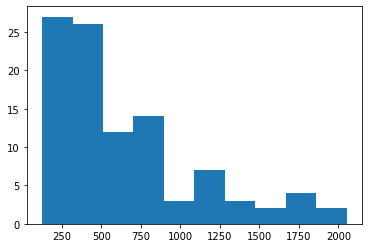

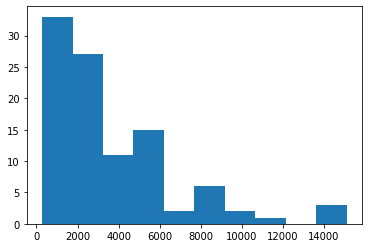

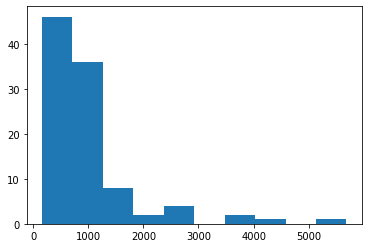

In [2]:
def time_to_convergence(update_func):
    initialize()
    counter = 0
    while not is_converged():
        update_func()
        counter += 1
    return counter


import matplotlib.pyplot as plt
for update_func in [update_original, update_reversed, update_edgebased]:
    counter_list = []
    for _ in range(100):
        counter_list.append(time_to_convergence(update_func))
        
    plt.hist(counter_list)
    plt.show()